### 🌍 Location-Based Clustering of Power System Faults (with Folium Maps)

This notebook demonstrates **location-based clustering** of the [Power System Faults Dataset](https://www.kaggle.com/datasets/ziya07/power-system-faults-dataset).  

We use fault **Latitude** and **Longitude** to identify **geographic hotspots**.  

Clustering methods included:
1. 📍 K-Means  
2. 🧭 DBSCAN  
3. 🌲 Agglomerative (Hierarchical)  
4. ✨ Spectral Clustering  
5. ⚡ MiniBatchKMeans  
6. 🌿 Birch  
7. 🔎 OPTICS  
8. 🎯 MeanShift  

We visualize results with:
- **Scatter plots (Seaborn)**  
- **Interactive maps (Folium)**  


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

***
### 📥 Load the dataset from URL

In [2]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/fault_data.csv'
df = pd.read_csv(url)

# Parse coordinates into numeric columns
df[['Latitude', 'Longitude']] = df['Fault Location (Latitude, Longitude)']\
    .str.replace('[()]', '', regex=True).str.split(', ', expand=True).astype(float)

df[['Fault ID','Fault Type','Latitude','Longitude']].head()

Fault ID           Fault Type  Latitude  Longitude
0     F001        Line Breakage   34.0522  -118.2437
1     F002  Transformer Failure   34.0560  -118.2450
2     F003          Overheating   34.0525  -118.2440
3     F004        Line Breakage   34.0550  -118.2420
4     F005  Transformer Failure   34.0545  -118.2430

#### 📂 Load dataset from local folder

In [3]:
# # Load dataset
# df = pd.read_csv("data/fault_data.csv")

# # Parse coordinates into numeric columns
# df[['Latitude', 'Longitude']] = df['Fault Location (Latitude, Longitude)']\
#     .str.replace('[()]', '', regex=True).str.split(', ', expand=True).astype(float)

# df[['Fault ID','Fault Type','Latitude','Longitude']].head()


***
#### ⚙️ Preprocessing

We use **Latitude** and **Longitude** for clustering, standardized to remove scale effects.


In [4]:
from sklearn.preprocessing import StandardScaler

# Select location features
X_loc = df[['Latitude','Longitude']]

# Standardize coordinates
scaler = StandardScaler()
X_loc_scaled = scaler.fit_transform(X_loc)


In [5]:
import folium

def plot_folium_map(df, cluster_col, title):
    m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=8)
    colors = ['red','blue','green','purple','orange','darkred','lightblue','darkgreen','black','pink']
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=colors[row[cluster_col] % len(colors)] if row[cluster_col] != -1 else 'gray',
            fill=True,
            fill_opacity=0.7,
            popup=f"Fault ID: {row['Fault ID']}<br>Cluster: {row[cluster_col]}"
        ).add_to(m)
    # m.save(f"{cluster_col}_map.html")
    return m


***
#### 📍 K-Means Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

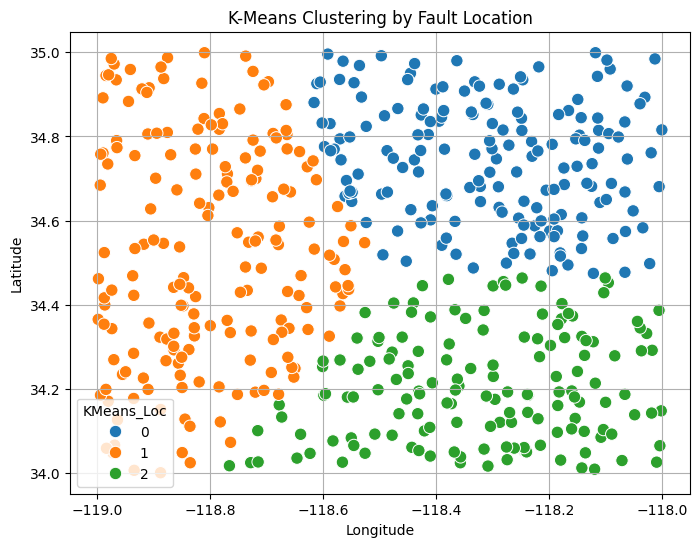

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
df['KMeans_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='KMeans_Loc', palette='tab10', s=80)
plt.title("K-Means Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'KMeans_Loc', '📍 K-Means Clustering')


***
#### 🧭 DBSCAN Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

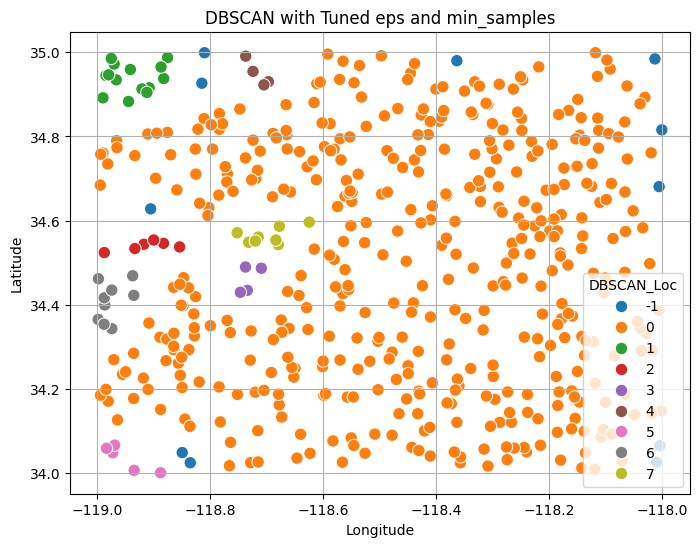

In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Try smaller eps
dbscan = DBSCAN(eps=0.2, min_samples=3)  
labels = dbscan.fit_predict(X_loc_scaled)

df['DBSCAN_Loc'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='DBSCAN_Loc', palette='tab10', s=80)
plt.title("DBSCAN with Tuned eps and min_samples")
plt.grid(True)
plt.show()


# Folium map
plot_folium_map(df, 'DBSCAN_Loc', '🧭 DBSCAN Clustering')


***
#### 🪜 Agglomerative Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

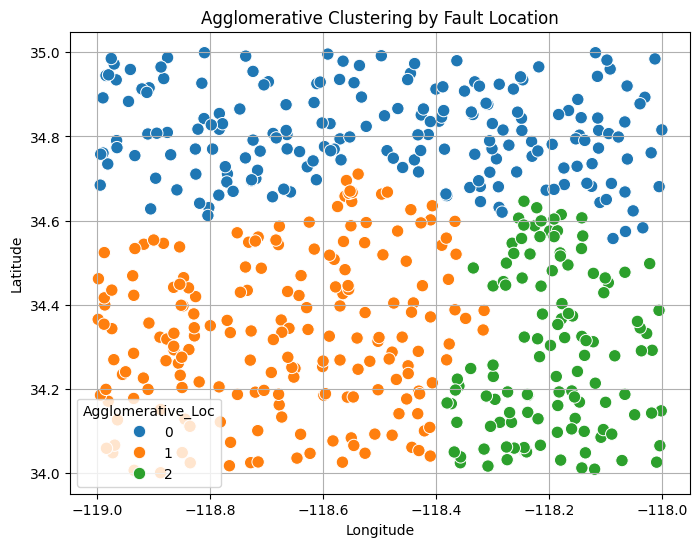

In [8]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Agglomerative_Loc', palette='tab10', s=80)
plt.title("Agglomerative Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'Agglomerative_Loc', '🪜 Agglomerative Clustering')

***
#### ✨ Spectral Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

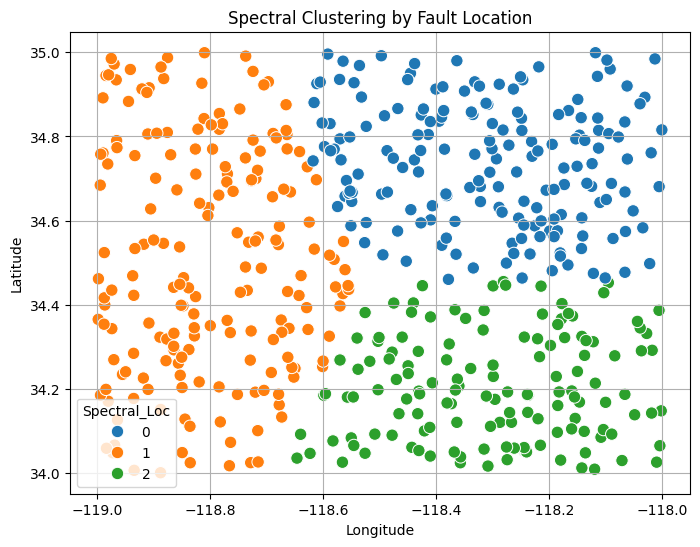

In [9]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, assign_labels='kmeans', random_state=42)
df['Spectral_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Spectral_Loc', palette='tab10', s=80)
plt.title("Spectral Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'Spectral_Loc', '✨ Spectral Clustering')


***
#### ⚡ MiniBatch K-Means Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

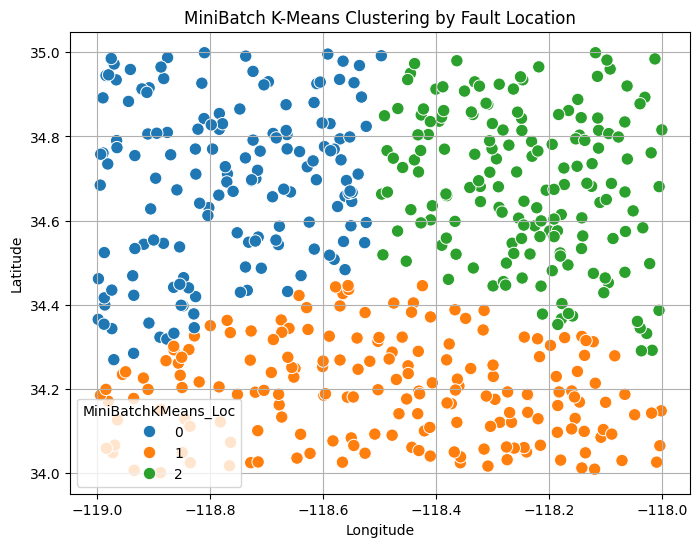

In [10]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3, random_state=42)
df['MiniBatchKMeans_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MiniBatchKMeans_Loc', palette='tab10', s=80)
plt.title("MiniBatch K-Means Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'MiniBatchKMeans_Loc', '⚡ MiniBatch K-Means Clustering')


***
#### 🌿 Birch Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

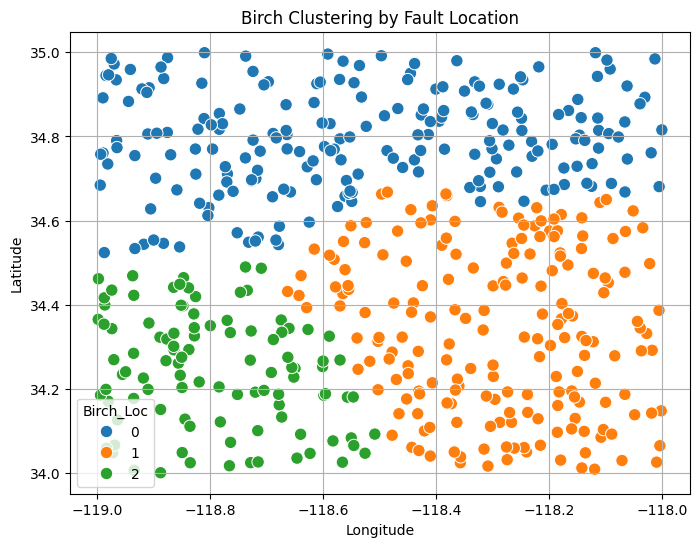

In [11]:
from sklearn.cluster import Birch

model = Birch(n_clusters=3)
df['Birch_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Birch_Loc', palette='tab10', s=80)
plt.title("Birch Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'Birch_Loc', '🌿 Birch Clustering')


***
#### 🔎 OPTICS Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

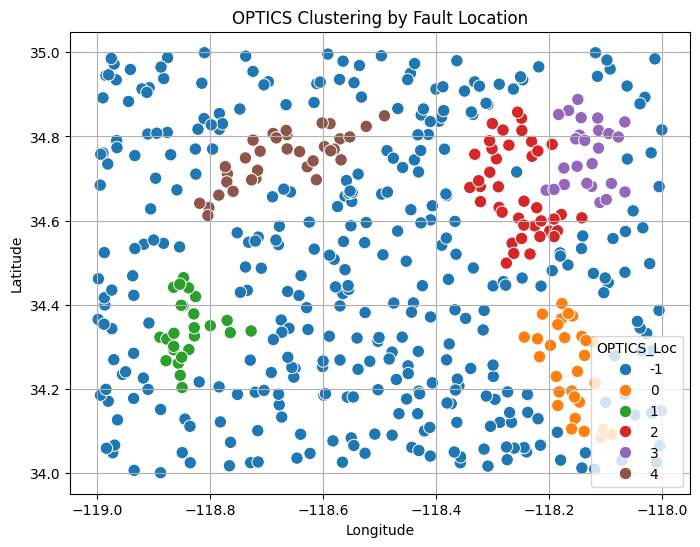

In [12]:
from sklearn.cluster import OPTICS

model = OPTICS(min_samples=3, xi=0.05, min_cluster_size=0.05, cluster_method='xi')
df['OPTICS_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='OPTICS_Loc', palette='tab10', s=80)
plt.title("OPTICS Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'OPTICS_Loc', '🔎 OPTICS Clustering')


***
#### 🎯 MeanShift Clustering

Scatter plot and interactive map of clusters based on **Latitude vs Longitude**.

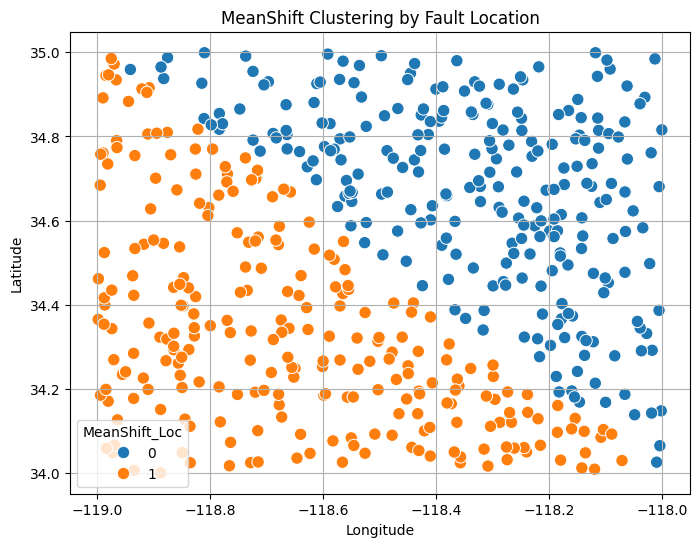

In [13]:
from sklearn.cluster import MeanShift

model = MeanShift()
df['MeanShift_Loc'] = model.fit_predict(X_loc_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MeanShift_Loc', palette='tab10', s=80)
plt.title("MeanShift Clustering by Fault Location")
plt.grid(True)
plt.show()

# Folium map
plot_folium_map(df, 'MeanShift_Loc', '🎯 MeanShift Clustering')

***
#### 🔍 Interpretation

- **K-Means / MiniBatchKMeans**: Good for dividing faults into a set number of regions.  
- **DBSCAN / OPTICS**: Excellent for detecting **dense fault hotspots** and identifying noise/outliers.  
- **Agglomerative / Birch**: Useful for **hierarchical or nested fault grouping**.  
- **Spectral**: Can handle **non-convex geographic clusters**.  
- **MeanShift**: Finds clusters automatically without specifying `k`.  

🌍 With Folium maps, results are easy to interpret for **regional reliability analysis**.
